# Nomes e bebês americanos de 1880 a 2010

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

- Extraindo os dados para a analize

In [80]:
names1880= pd.read_csv('datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


- Calculando a soma total de nascimentos por sexo

In [106]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

- Reunindo todos os dados de 1880 a 2010 em um único DataFrame

In [82]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
    #concatena tudo em um único dataframe
    names = pd.concat(pieces, ignore_index=True)
    
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [83]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


- Plotagem gráfica

<AxesSubplot: title={'center': 'Total births by sex and year'}, xlabel='year'>

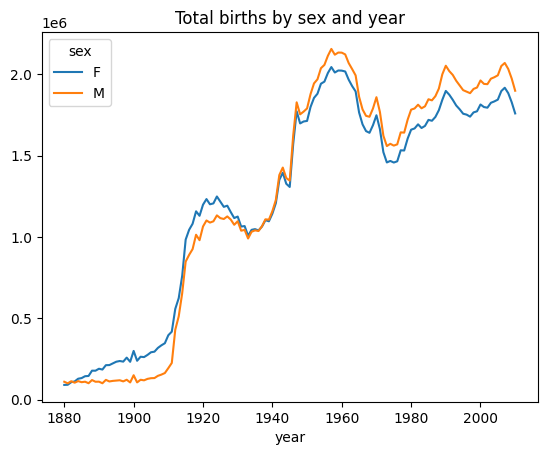

In [84]:
total_births.plot(title='Total births by sex and year')

- Inserindo a proporção de bebês que receberem cada nome em relação ao número total de nascimentos

In [85]:
def add_prop(group):
    group['prop'] = (group.births / group.births.sum()) * 100
    return group

names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop)

In [86]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,7.764334
1,Anna,F,2604,1880,2.861759
2,Emma,F,2003,1880,2.201268
3,Elizabeth,F,1939,1880,2.130933
4,Minnie,F,1746,1880,1.918829
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000263
1690780,Zyonne,M,5,2010,0.000263
1690781,Zyquarius,M,5,2010,0.000263
1690782,Zyran,M,5,2010,0.000263


In [87]:
# Verificando a legibilidade de prop
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      100.0
      M      100.0
1881  F      100.0
      M      100.0
1882  F      100.0
             ...  
2008  M      100.0
2009  F      100.0
      M      100.0
2010  F      100.0
      M      100.0
Name: prop, Length: 262, dtype: float64

- Definindo um top 1000 nomes por ano

In [88]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

gruoped = names.groupby(['year', 'sex'])
top1000 = gruoped.apply(get_top1000)
# descarta o índice de grupo que não será necessário
top1000.reset_index(inplace=True, drop=True)

In [89]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,7.764334
1,Anna,F,2604,1880,2.861759
2,Emma,F,2003,1880,2.201268
3,Elizabeth,F,1939,1880,2.130933
4,Minnie,F,1746,1880,1.918829
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.010219
261873,Destin,M,194,2010,0.010219
261874,Jaquan,M,194,2010,0.010219
261875,Jaydan,M,194,2010,0.010219


In [90]:
top1000[(top1000.year == 2010) & (top1000.sex == 'M')].head(10)

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,1.152297
260878,Ethan,M,17866,2010,0.941117
260879,Michael,M,17133,2010,0.902505
260880,Jayden,M,17030,2010,0.897080
260881,William,M,16870,2010,0.888651
260882,Alexander,M,16634,2010,0.876220
260883,Noah,M,16281,2010,0.857625
260884,Daniel,M,15679,2010,0.825914
260885,Aiden,M,15403,2010,0.811375
260886,Anthony,M,15364,2010,0.809321


- _Analisando as tendências para nomes_

In [91]:
# Separandos nomes masculinos e femininos
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

- Plotage, de uma tabela pivô com o número total de nascimentos por ano e por alguns nomes

array([<AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>, <AxesSubplot: xlabel='year'>,
       <AxesSubplot: xlabel='year'>], dtype=object)

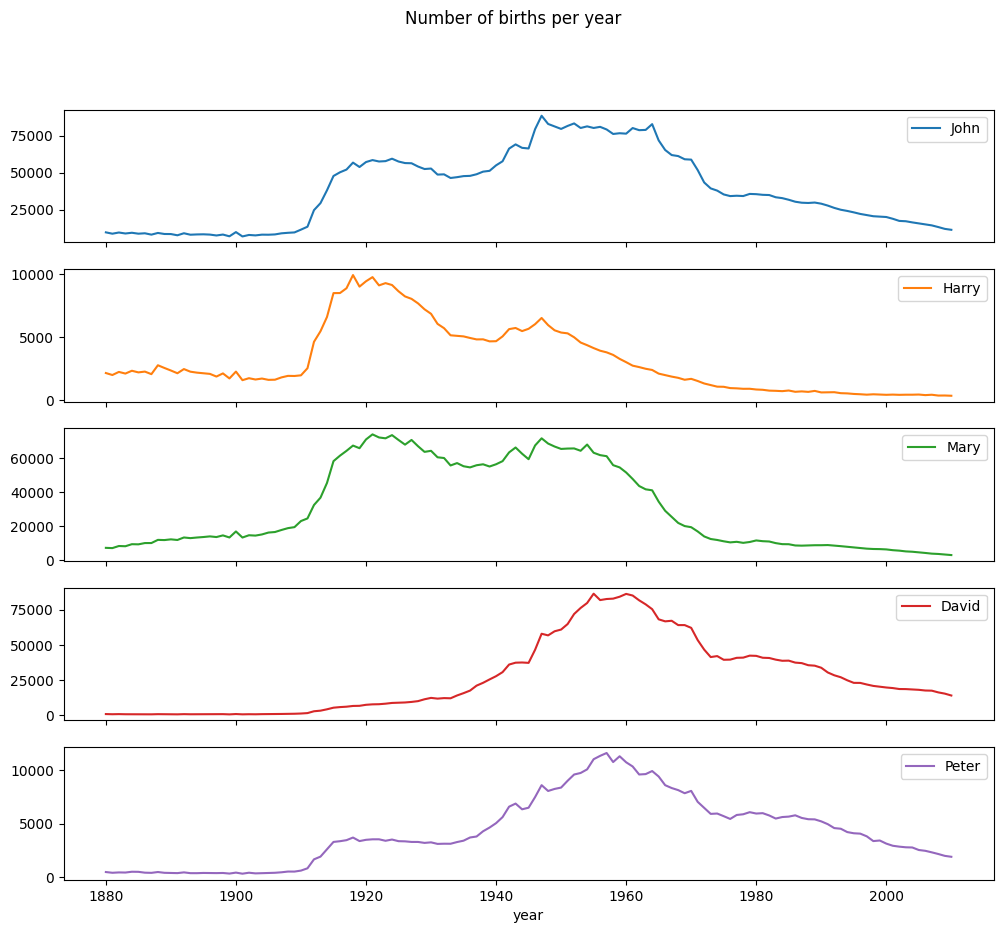

In [92]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name', aggfunc=sum)

subset = total_births[['John', 'Harry', 'Mary', 'David', 'Peter']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title='Number of births per year')

- Avaliando o aumento na diversidade dos nomes

<AxesSubplot: title={'center': 'Sum os table1000.prop by year and sex'}, xlabel='year'>

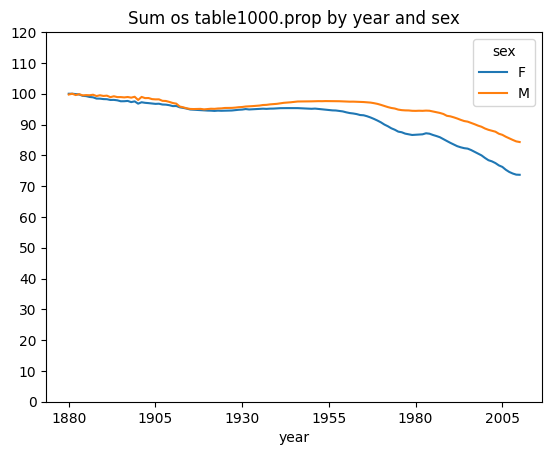

In [93]:
#Proporção de nascimentos representada pelos 1000 nomes mais populares
table = top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum os table1000.prop by year and sex', 
           yticks=np.linspace(0, 120, 13), xticks=range(1880, 2020, 25))

In [94]:
#Calculando a quantidade de nomes distintos tomandos em ordem de popularidade 
# nos primeiros 50% dos nascimentos
df = boys[boys.year == 2010] # Fazendo o calculo com nomes masculinos
prop_cumsum = df['prop'].sort_values(ascending=False).cumsum()
prop_cumsum.values.searchsorted(50)

116

In [95]:
#Realizando o mesmo calculo para o ano de 1900
df = boys[boys.year == 1900]
in1900 = df['prop'].sort_values(ascending=False).cumsum()
in1900.values.searchsorted(50)

24

In [96]:
# Aplicando essa operação em cada combinação de ano/sexo
def get_quantule_count(gruop, q=50):
    gruop = gruop.sort_values(by='prop', ascending=False)
    return gruop.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantule_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<AxesSubplot: title={'center': 'Number of popular names in top 50'}, xlabel='year'>

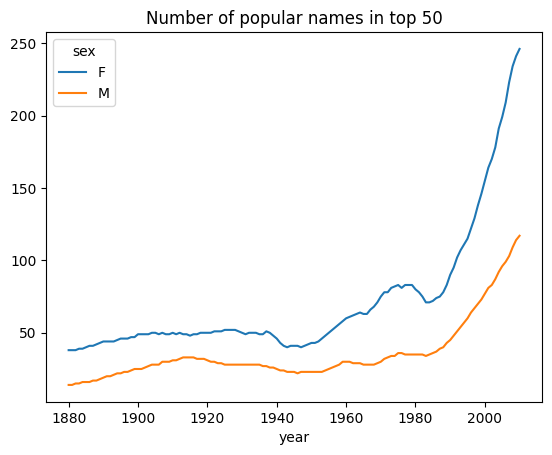

In [97]:
diversity.plot(title='Number of popular names in top 50')

- A revolução da última letra

In [98]:
# Extrai a última letra da coluna de nomes
get_last_letter = lambda x: x[-1]
last_letter = names.name.map(get_last_letter)

last_letter.name = 'last_letter'
table = names.pivot_table(values='births', index=last_letter,
                          columns=['sex', 'year'], aggfunc=sum)

subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [99]:
# Proporção do total de nascimentos para cada sexo com o nome 
# finalizado com a mesma letra
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

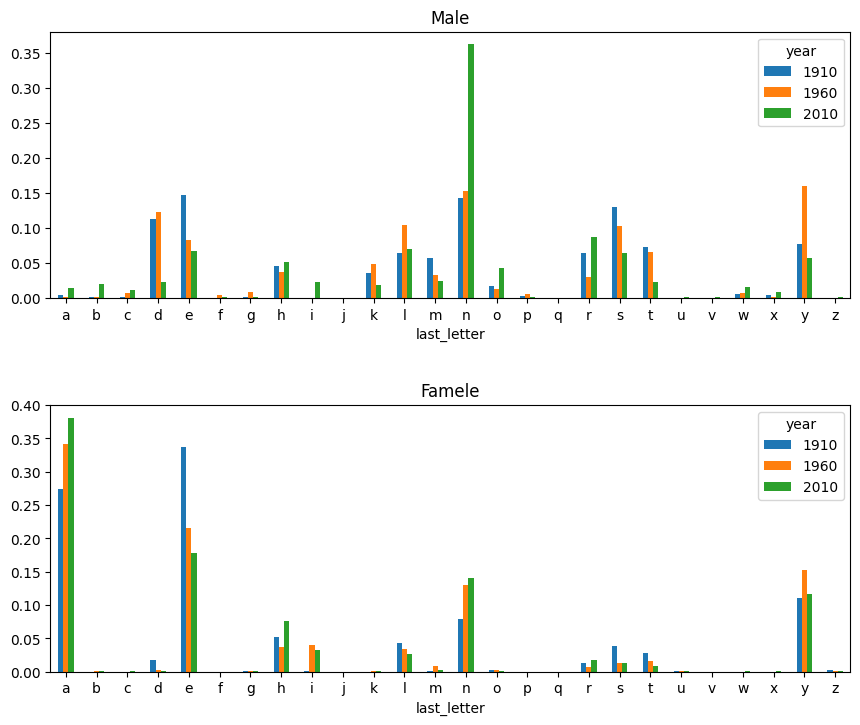

In [100]:
# Plotagem de barras para cada sexo, separadas por ano
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Famele')
# Ajuste as margens entre as subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.4)

<AxesSubplot: xlabel='year'>

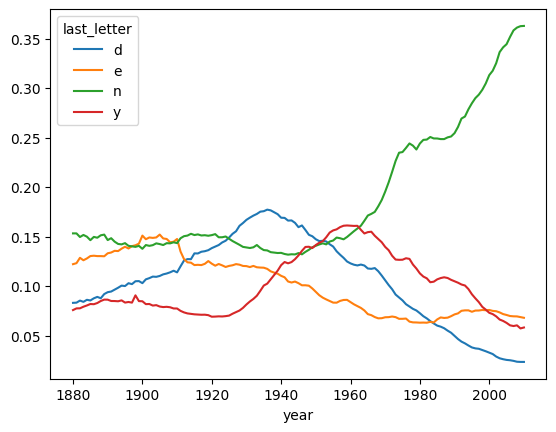

In [101]:
#Calculando as tendências ao longo do tempo em relação as letras 'd', 'e', 'n' e 'y'
# nos nomes masculinos

letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'e', 'n', 'y'], 'M'].T #T -> verticaliza a tabela
dny_ts.plot()

- Nomes masculinos que passaram a ser nomes femininos e vice-versa

In [102]:
# Usando como exemplo os nomes Lesley ou Leslie

all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [103]:
# Somando os nascimentos agrupados por nome a fim de ver as frequências relativas
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [104]:
#Agregando por sexo e por ano
table = filtered.pivot_table(values='births', index='year',
                             columns='sex', aggfunc=sum)
table = table.div(table.sum(1), axis=0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


<AxesSubplot: xlabel='year'>

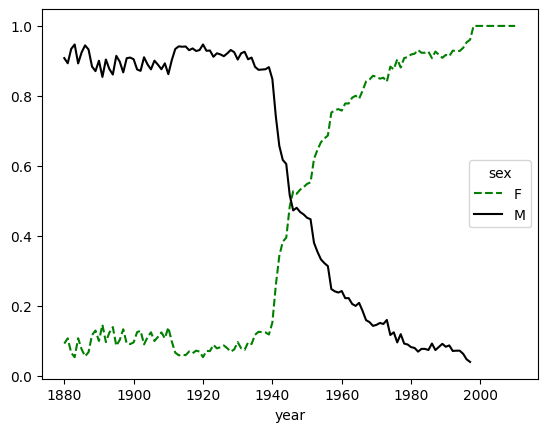

In [105]:
# Proporção de nomes masculinos/femininos semelhantes a Lesley no tempo
table.plot(style={'M': 'k-', 'F': 'g--'})